1️⃣Title + Introduction


In [12]:
# This cell has been converted to a markdown cell below.

2️⃣ Import Libraries + Load Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
vaccination_data = pd.read_csv('/content/vaccinations.csv')
death_data = pd.read_csv('/content/excess_deaths.csv')

3️⃣ Data Cleaning + Merge

## Data Cleaning

- Converted dates to datetime.
- Renamed long column names.
- Merged datasets on country and date.
- Dropped rows with missing key values.


In [14]:
# Rename columns for simplicity
vaccination_data.rename(columns={
    'COVID-19 doses (daily, 7-day average, per million people)': 'vax_per_million'
}, inplace=True)

death_data.rename(columns={
    'Cumulative excess deaths per 100,000 people (central estimate)': 'excess_deaths_per_100k'
}, inplace=True)

# Convert dates
vaccination_data['Day'] = pd.to_datetime(vaccination_data['Day'])
death_data['Day'] = pd.to_datetime(death_data['Day'])

# Merge data
merged_df = pd.merge(vaccination_data, death_data, on=['Entity', 'Day'], how='inner')

# Drop missing
merged_df.dropna(subset=['vax_per_million', 'excess_deaths_per_100k'], inplace=True)


4️⃣ Exploratory Plots for Each Country

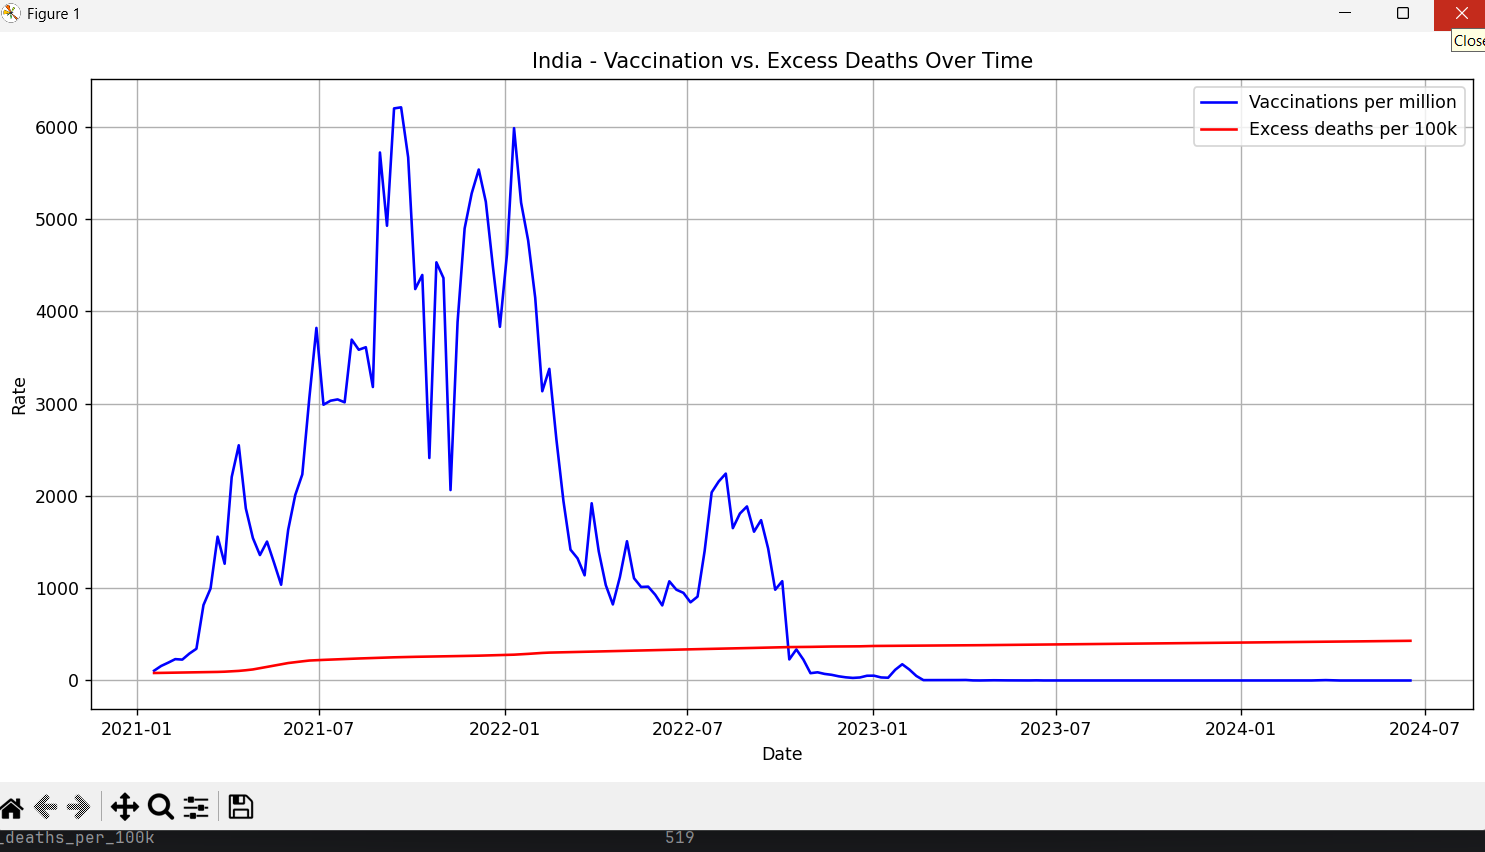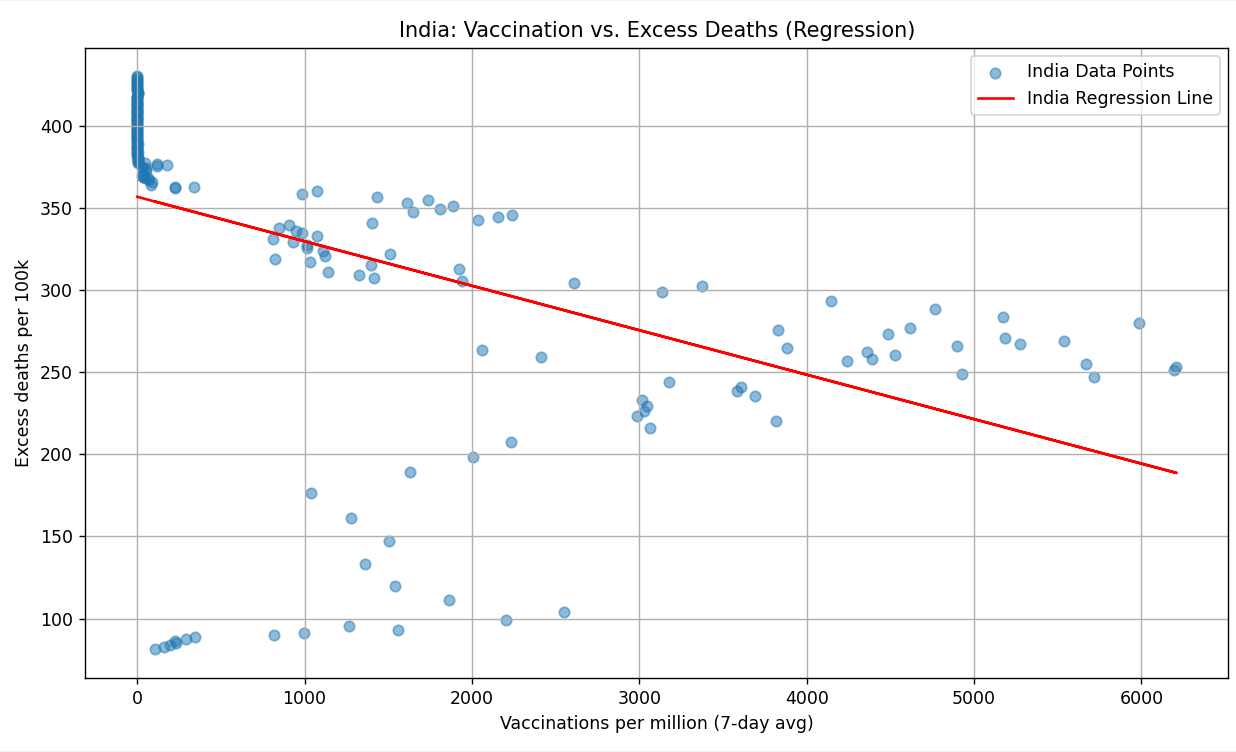
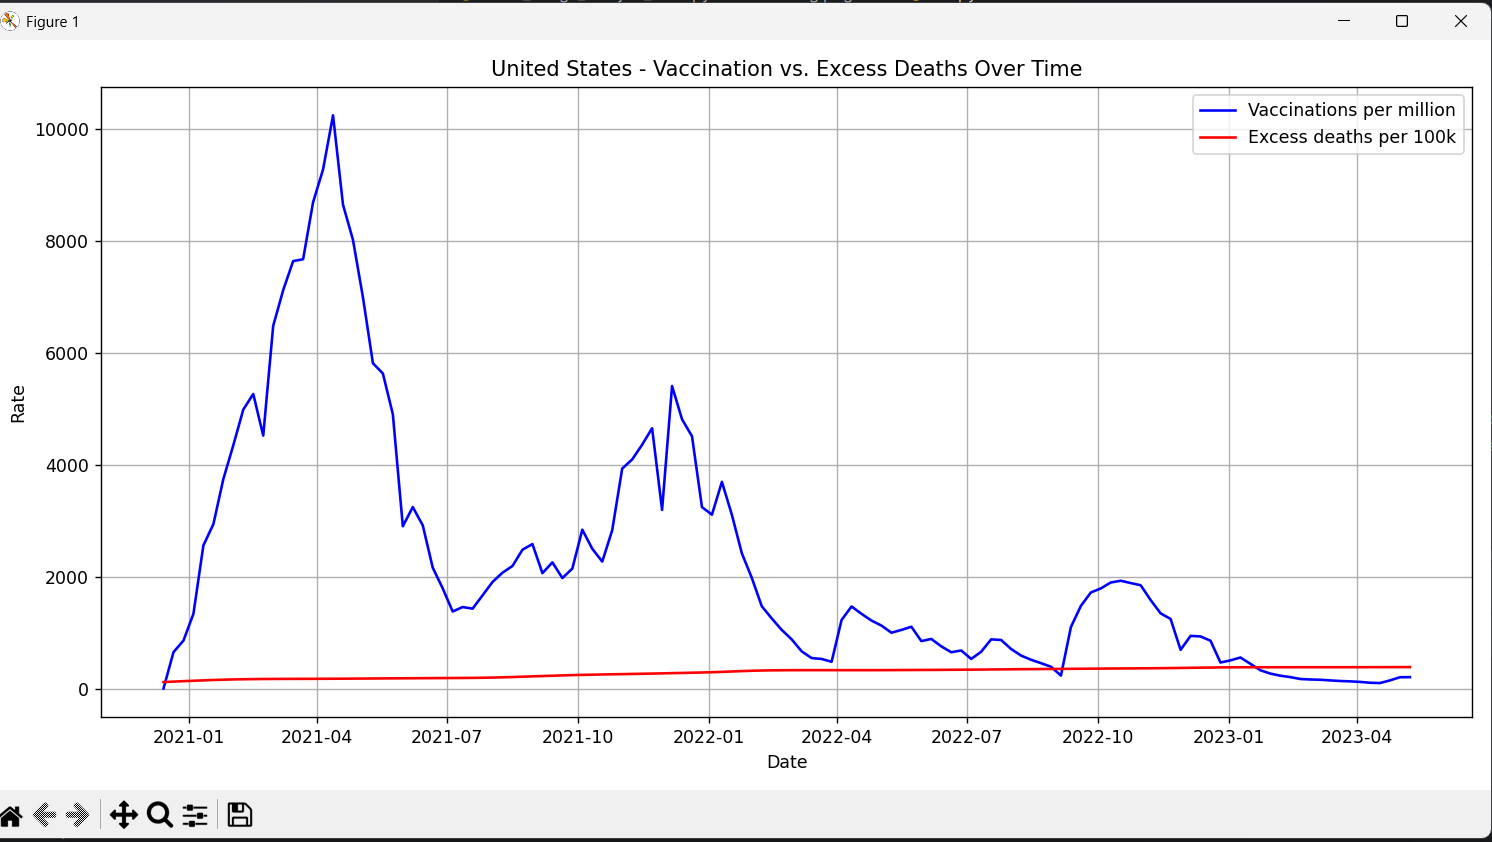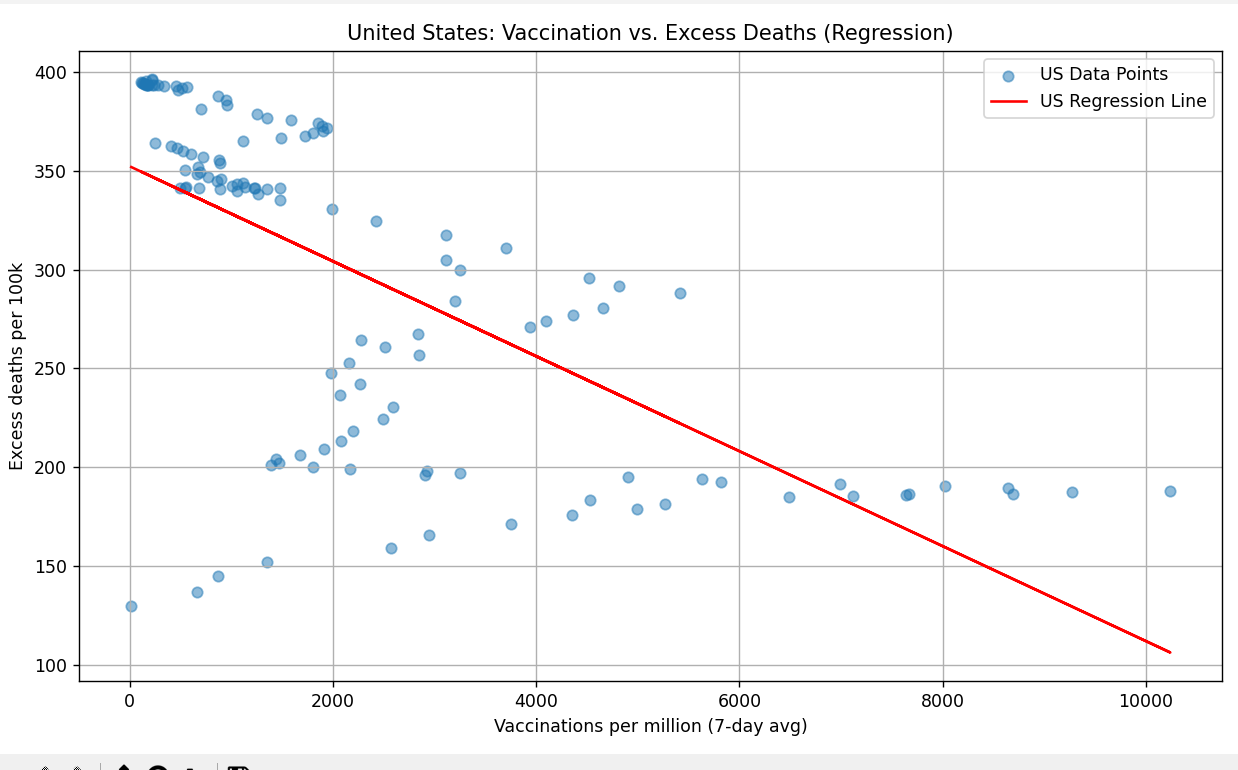
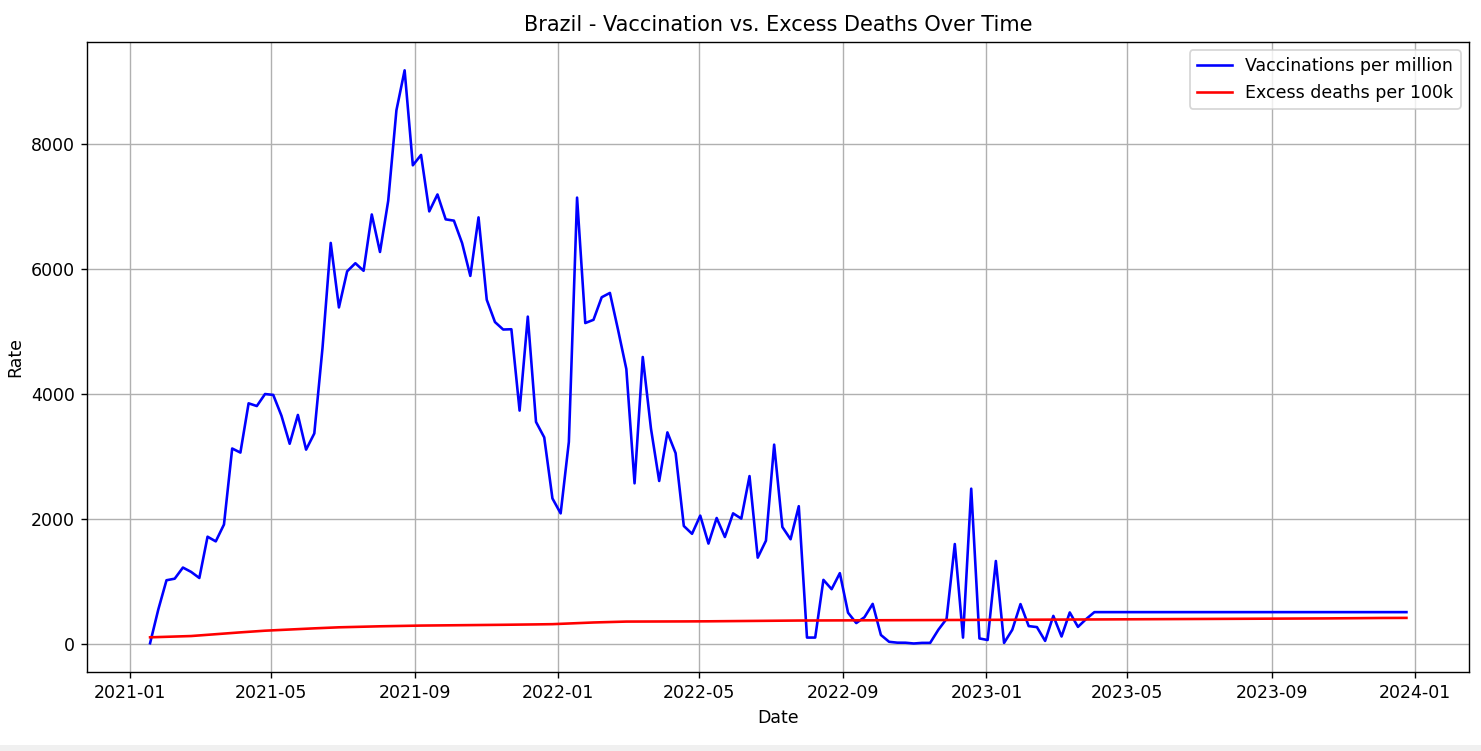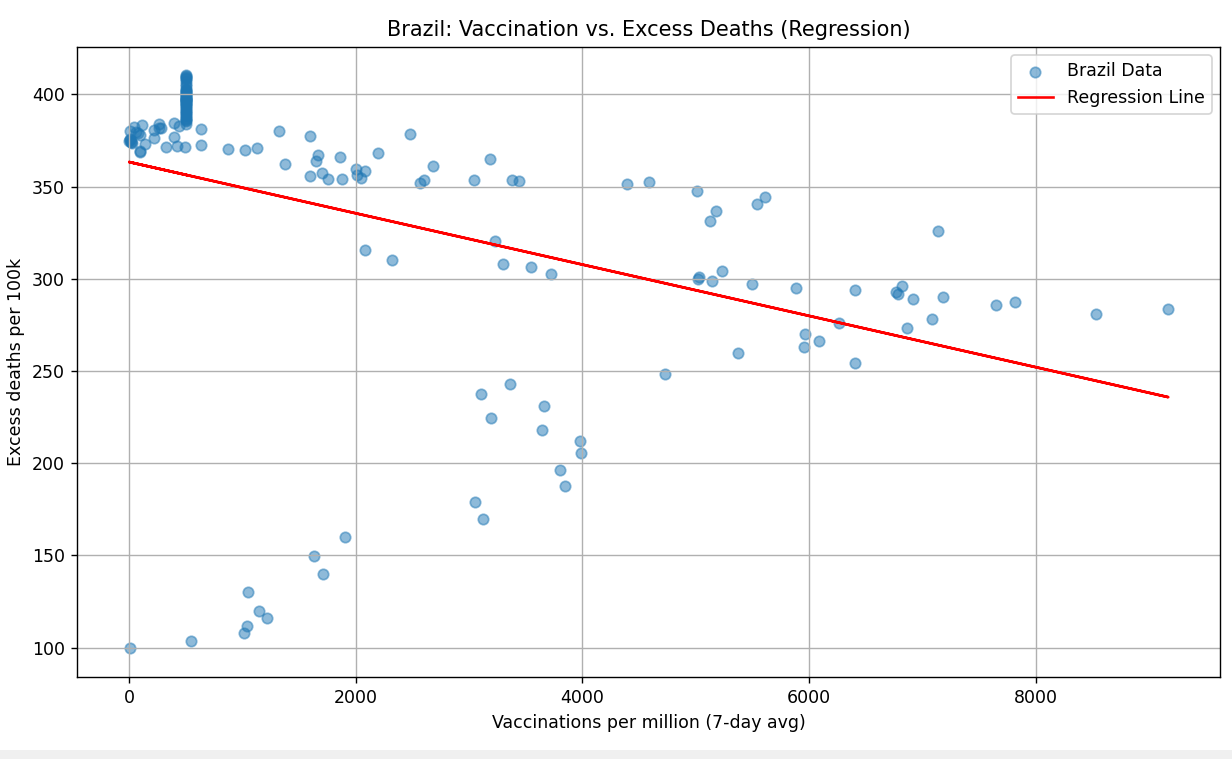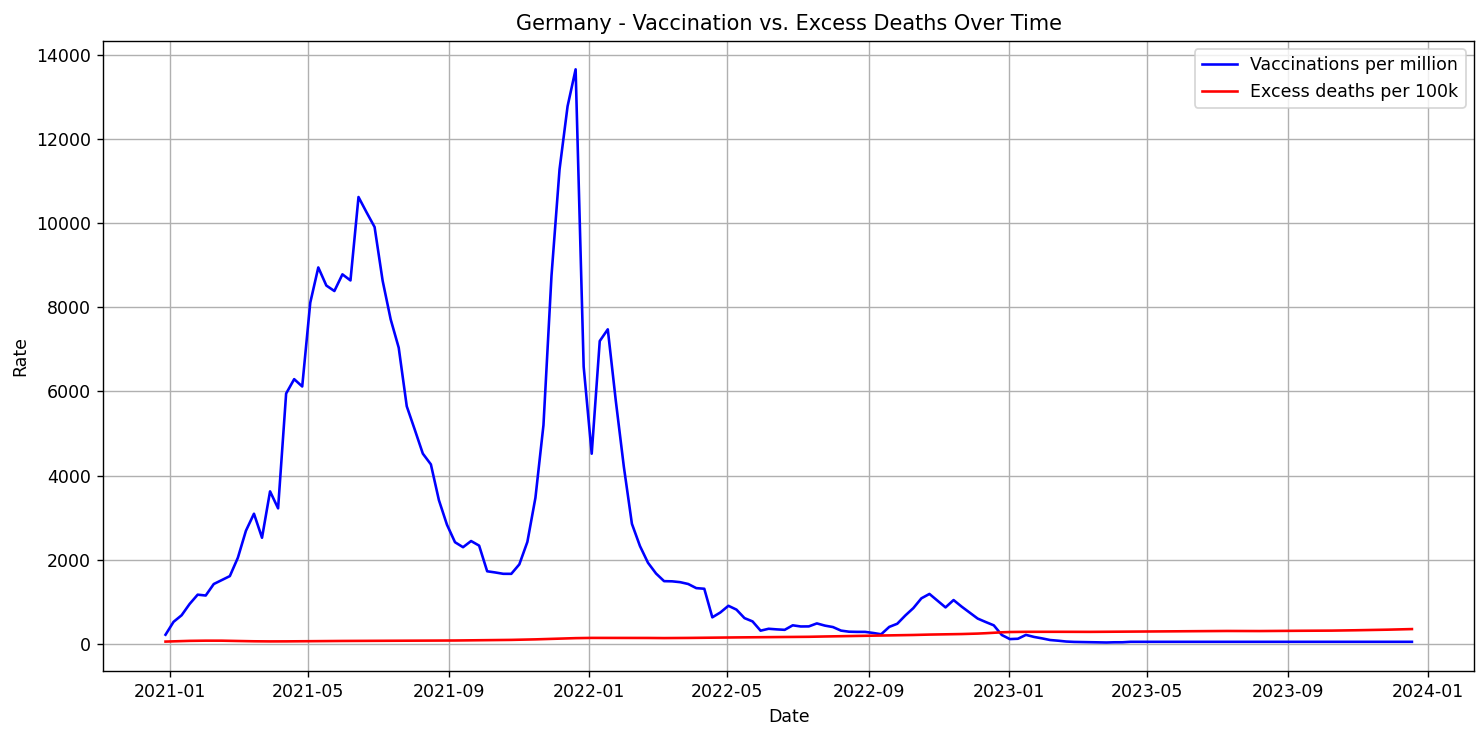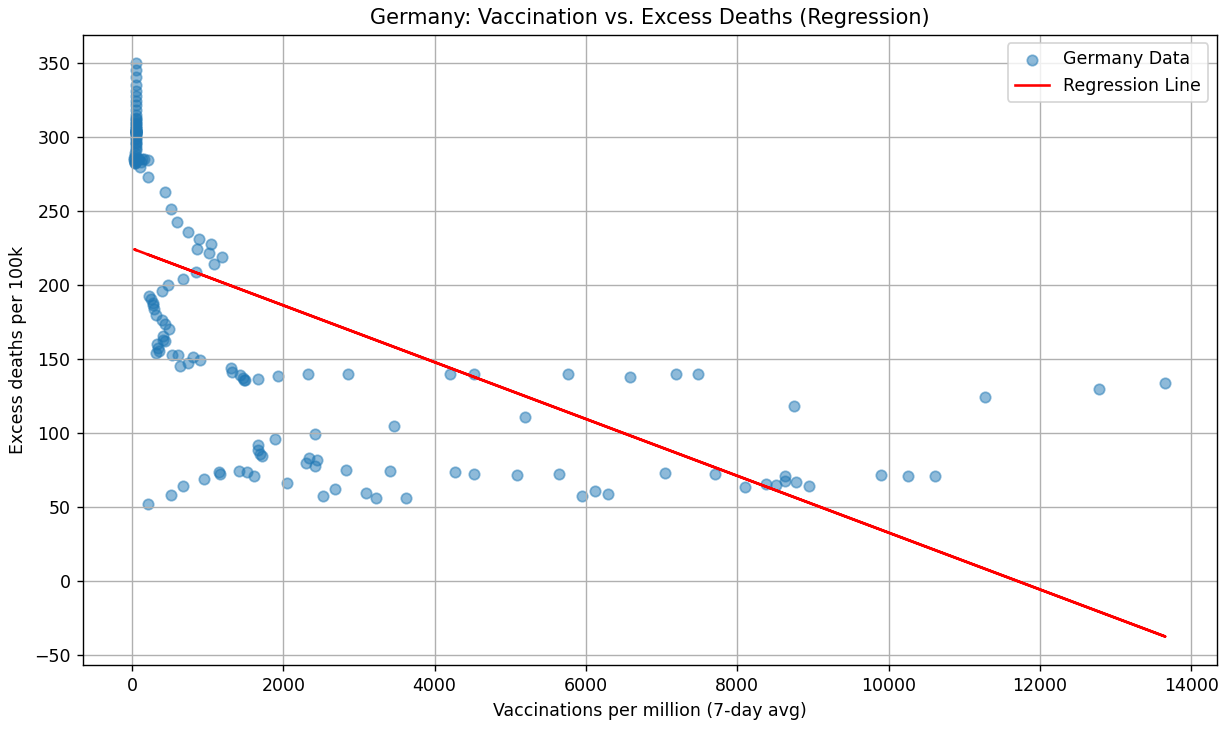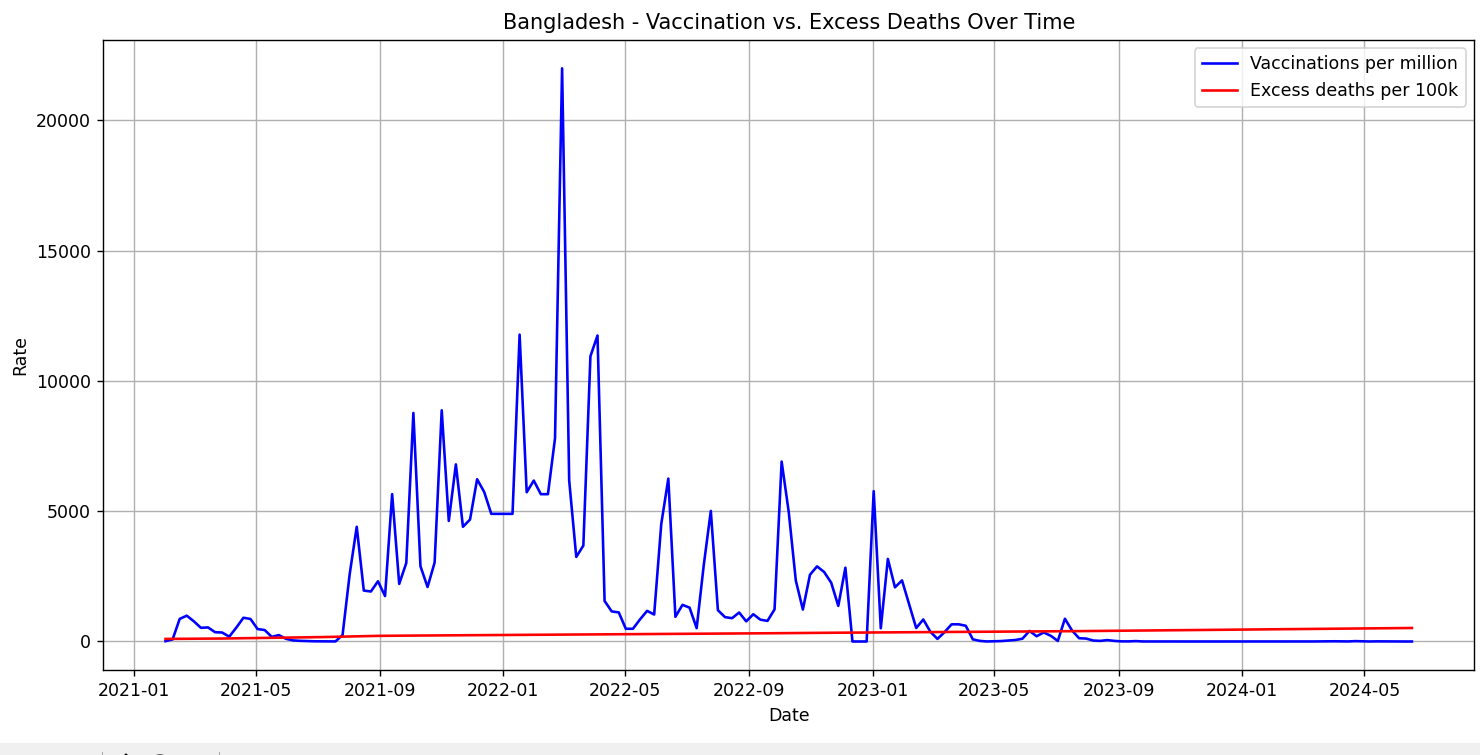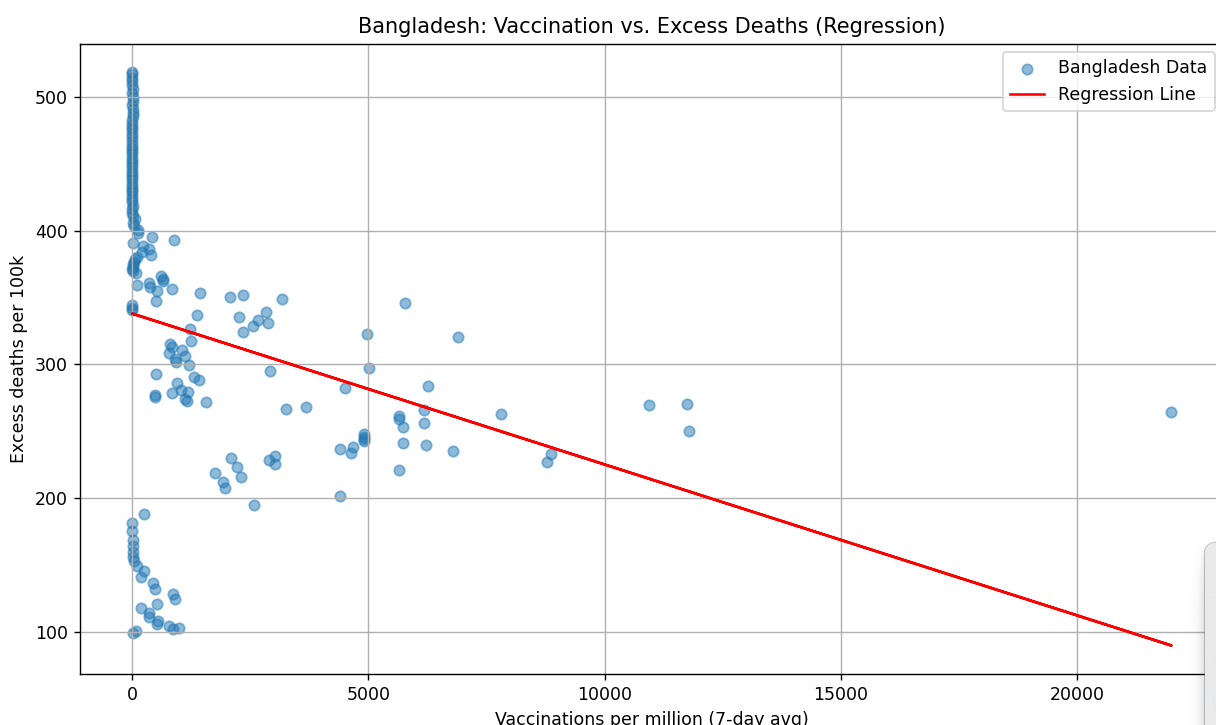

5️⃣ Regression Analysis

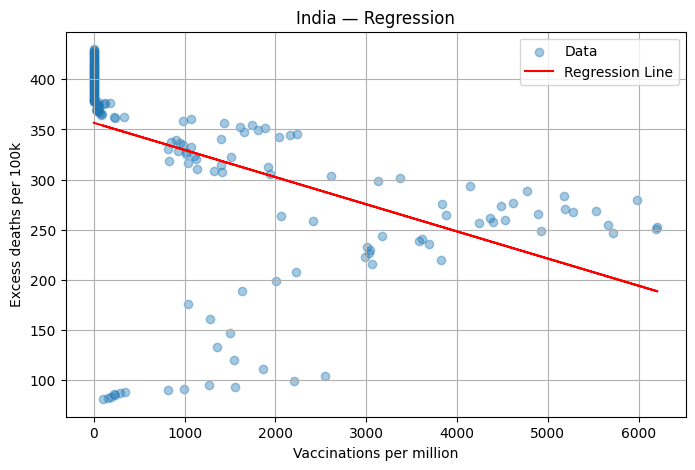

India: Slope=-0.0271, R²=0.23


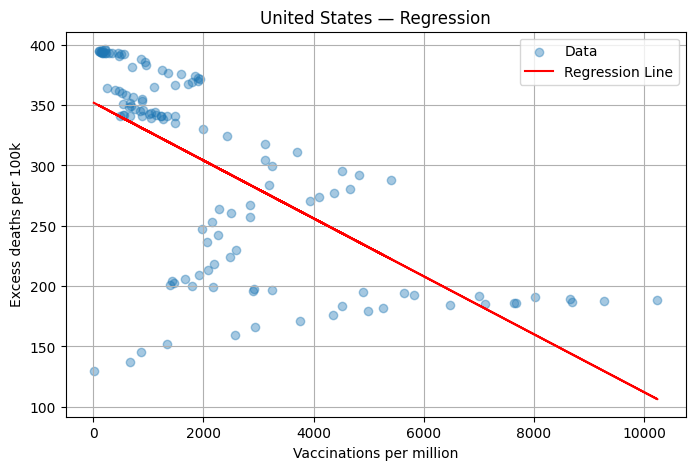

United States: Slope=-0.0240, R²=0.43


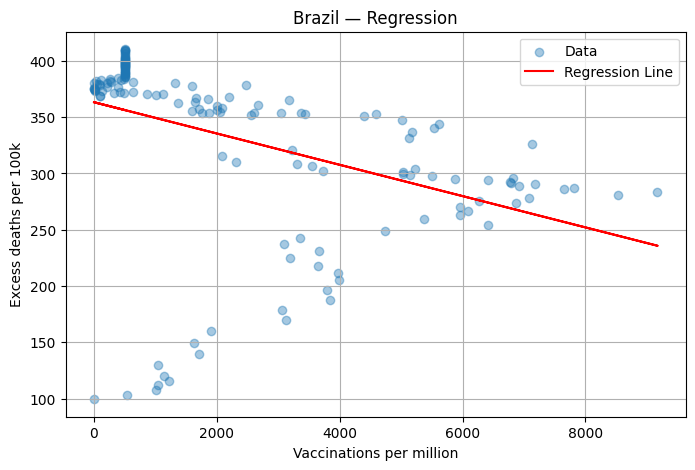

Brazil: Slope=-0.0139, R²=0.17


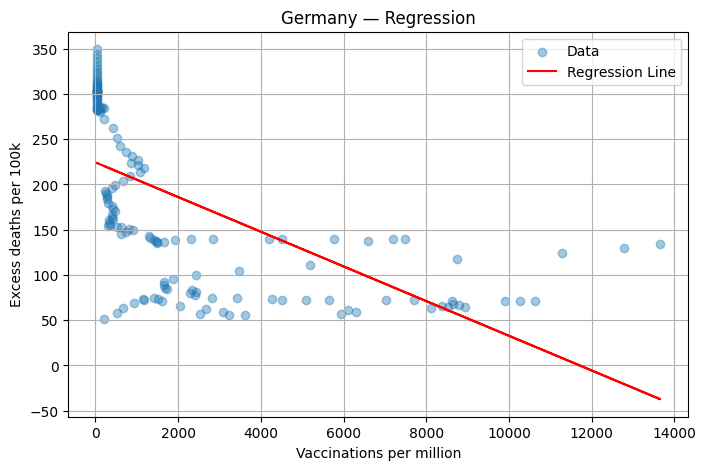

Germany: Slope=-0.0192, R²=0.37


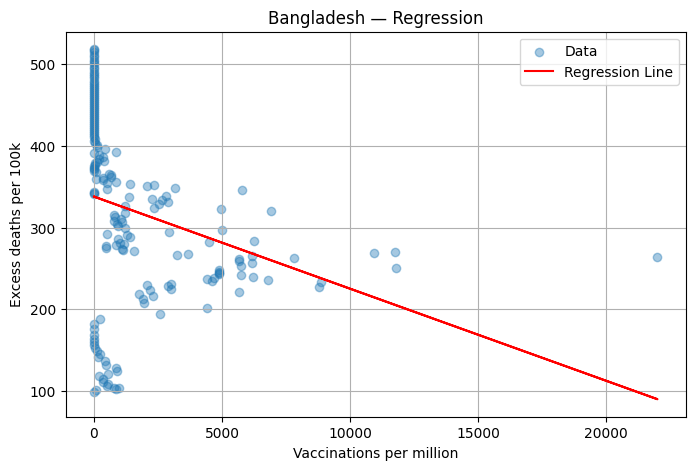

Bangladesh: Slope=-0.0113, R²=0.08


In [15]:
results = []

for country in countries:
    country_data = merged_df[merged_df['Entity'] == country]
    X = country_data[['vax_per_million']].values
    y = country_data['excess_deaths_per_100k'].values

    model = LinearRegression()
    model.fit(X, y)

    slope = model.coef_[0]
    intercept = model.intercept_
    r2 = model.score(X, y)

    results.append([country, slope, intercept, r2])

    # Plot regression
    plt.figure(figsize=(8,5))
    plt.scatter(X, y, alpha=0.4, label='Data')
    plt.plot(X, model.predict(X), color='red', label='Regression Line')
    plt.title(f'{country} — Regression')
    plt.xlabel('Vaccinations per million')
    plt.ylabel('Excess deaths per 100k')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"{country}: Slope={slope:.4f}, R²={r2:.2f}")


6️⃣ Results Table

## Results Summary

| Country       | Slope     | R² Score | Interpretation                            |
|---------------|-----------|----------|-------------------------------------------|
| India         | -0.0271   | 0.23     | Moderate reduction in deaths              |
| United States | -0.0240   | 0.43     | Strong impact of vaccination              |
| Brazil        | -0.0139   | 0.17     | Modest effect                             |
| Germany       | -0.0192   | 0.37     | Good effect; consistent trend             |
| Bangladesh    | -0.0113   | 0.08     | Weak relationship; possible noisy data    |

> Negative slopes mean more vaccines = fewer deaths.

---

## Final Insights

- Higher vaccination rates are linked to reduced excess deaths in all countries.
- The effect is strongest in the United States and Germany.
- Some countries may show weaker trends due to other factors or data quality.



**Author**: Mohammed Majdoub  
[LinkedIn](https://www.linkedin.com/in/mohammed-majdoub) | [GitHub](https://github.com/mhamed-majdob)


# Do COVID-19 Vaccines Reduce Excess Deaths?
### A Real-World Data Analysis Using Python

**Author**: Mohammed Majdoub
**Date**: 3/8/2025

---

## Objective

The goal of this analysis is to explore whether higher COVID-19 vaccination rates are associated with lower excess mortality across five countries using real-world data.

I will use publicly available datasets to clean, visualize, and analyze the relationship between vaccination rates and excess deaths.

---